
# Assessment

- **CANDIDATE:** Samuel Nnitiwe Theophilus<br>
- **EMAIL:** nnitiwe@gmail.com <br>

Assume you are a data scientist at Mono, and our partners building personal finance management apps need to implement a spending behavior feature. You are tasked to build a tool that will label transaction statements, this tool should be able to pick transaction narrations and classify them to the appropriate spend category. 

eg. this transaction needs to be classified as a spend category of Phone & Internet  `Airtime Purchase GTWORLD-101CT0000000003236216717-2348120556688-AIRTIME`

1. Brainstorm a concept you can use to achieve this
2. Build the proof of concept(POC) baseline Machine Learning model using the dataset provided below
3. Draft a report on how you intend to improve it (your model is not expected to be 100% accurate)
4. If we have 30 partners with 100k users each using your tool at the same time, how will you tackle scalability or latency issue
5. You have 5-7 days to complete this assessment, early submission is a plus.
6. Upload your code to GitHub, deploy your tool to any platform of your choice with a simple web interface to test this
7. Share a google doc with the GitHub link, web interface link, and a brief answer to number 2 & 3 above (make sure the document is publicly accessible)

# Load & Preprocess Data

This project is a Natural Language Processing project. We will be working with following text to process the dataset and train our model.

In [ ]:
#import libraries
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
import re
import nltk
from sklearn import feature_extraction, svm,model_selection
import pandas as pd
from sklearn.metrics import classification_report
import joblib
from matplotlib import pyplot
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load CSV files:

In [ ]:
#load features
interview_df = pd.read_csv("/content/export interview data.csv")
interview_df.head()

,narrations,label
0,NIBSS Instant Payment Outward via GTWORLD TO W...,1
1,COMMISSION NIP TRANSFER COMMISSION FOR via GTW...,1
2,FAILED NIBSS INSTANT PAYMENT NIP Reversal: Fai...,1
3,POS/WEB PURCHASE TRANSACTION -- --Barter/FLW i...,1
4,sms alert charges doe john,24


In [ ]:
#load label description
labels_df=pd.read_csv("/content/label.csv")
labels_df.head()

,Unnamed: 0,label,indd,label2
0,0,BankCharges,24,bank_charges
1,1,Transfer,1,transfer
2,2,OnlineTransactions,2,online_transactions
3,3,VAT,3,vat
4,4,PhoneAndInternet,4,phone_and_internet


In [ ]:
#Replace Label 24 to 0
interview_df=interview_df.replace(24,0)
labels_df=labels_df.replace(24,0)

View summary of Spending Catergory distributions:

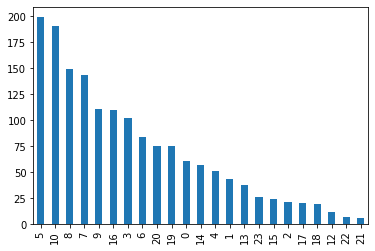

In [ ]:
interview_df['label'].value_counts().plot(kind='bar')

In [ ]:
#Clean text text by converting to lowercase and removing punctuations
interview_df['clean_text']=interview_df['narrations'].map(lambda x: re.sub(r'[^\w\s]', '', str(x).lower().strip()))

In [ ]:
interview_df.head()

,narrations,label,clean_text
0,NIBSS Instant Payment Outward via GTWORLD TO W...,1,nibss instant payment outward via gtworld to w...
1,COMMISSION NIP TRANSFER COMMISSION FOR via GTW...,1,commission nip transfer commission for via gtw...
2,FAILED NIBSS INSTANT PAYMENT NIP Reversal: Fai...,1,failed nibss instant payment nip reversal fail...
3,POS/WEB PURCHASE TRANSACTION -- --Barter/FLW i...,1,posweb purchase transaction barterflw intersw...
4,sms alert charges doe john,0,sms alert charges doe john


# Split & Train Data

In [ ]:
## split dataframe into train-70% and Test-30% datasets
train_df, test_df = model_selection.train_test_split(interview_df, test_size=0.3)
## get target/label values as list
y_train = train_df["label"].values
y_test = test_df["label"].values

Lets build a vocalubary list of uniques words in the given data. This list will be passed into our Vectorizer.

In [ ]:
corpus_text = 'n'.join(interview_df['clean_text'])
unique_words = list()
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    unique_words.extend(temp)


unique_words=list(set(unique_words))
unique_words

['colecmb',
 'babangidanprinbuhari',
 'delicacies',
 'babangidanmthly',
 'doesh',
 'lazarus',
 'stpl',
 'cadastraa',
 'agency',
 'owo',
 'akindunmade',
 'lateesunday',
 'fi',
 'uac',
 'mirai',
 'egbeda',
 'cms',
 'christensennpos',
 'akinola',
 'lagos',
 'carpentry',
 'isaiah',
 've',
 'ng',
 'ladoe',
 'doeesunday',
 'enterprises',
 'patricia',
 'piggyv',
 'mbdoe',
 'buhariurther',
 'doenosibanjo',
 'olaore',
 'rd',
 'tallelbuhari',
 'stock',
 'shop',
 'christensenncsh',
 'saeed',
 'otu',
 'work',
 'adeleke',
 'wages',
 'abdulnneft',
 'mine',
 'week',
 'doendispense',
 'abdullp',
 'olakunle',
 'withdrbukola',
 'request',
 'bt',
 'babangidanmanagement',
 'sarakintransfer',
 'ijaiye',
 'balewancard',
 'johnsontion',
 'unity',
 'adams',
 'solid',
 'iguwa',
 'usman',
 'ezzy',
 'johnnbiometric',
 'sarakinstasunday',
 'habibinsix',
 'aiso',
 'any',
 'babangidaarri',
 'alaboson',
 'bowram',
 'oyewole',
 'arinze',
 'agegentransfer',
 'itunu',
 'fresh',
 'mushin',
 'gwarimpa',
 'lalily',
 'joe'

## Process Text using Bag of Words Vectortizer- TFIDF

In [ ]:
## Tf-Idf 
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

train_corpus = train_df["clean_text"]
test_corpus = test_df["clean_text"]

#Fit vectorizer using unique vocabulary list & transform train and test data into TFIDF structures
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=unique_words)
vectorizer.fit(train_corpus)
X_train = vectorizer.transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

In [ ]:
#intialize SVM classifer using RBF kernel
classifier = svm.SVC(kernel='rbf', C=1.0)

#train classifier
model=classifier.fit(X_train, y_train)

predicted = model.predict(X_test)

# Evaluate Model Performance

In [ ]:
#Filter label names for test data
indices=list(set(y_test.tolist()))
result_labels=labels_df.sort_values('indd', axis=0, ascending=True)['label'].tolist()

In [ ]:
#Generate Confusion Matrix for classification and structure into DataFrame
pd.DataFrame(classification_report(y_test,predicted, output_dict=True,target_names=[result_labels[i] for i in indices])).transpose()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
BankCharges,1.000000,0.608696,0.756757,23.000000
Transfer,1.000000,0.466667,0.636364,15.000000
OnlineTransactions,1.000000,0.250000,0.400000,4.000000
VAT,1.000000,0.954545,0.976744,22.000000
PhoneAndInternet,0.666667,0.400000,0.500000,15.000000
ATMWithdrawal,1.000000,0.841270,0.913793,63.000000
OfflineTransactions,0.878788,0.935484,0.906250,31.000000
StampDutiesCharges,1.000000,1.000000,1.000000,39.000000
ATMwithdrawalCharges,0.911111,1.000000,0.953488,41.000000
BillsOrFees,0.641026,0.892857,0.746269,28.000000


Model Accuracy: 79.8%

The saved models will be loaded into the Streamlit app to handle predictions.

In [ ]:
# Save the model and Vectorizer as a pickle files
joblib.dump(model, "clf-nlp-model.pickle")
joblib.dump(vectorizer, "clf-nlp-vectorizer.pickle")

['clf-nlp-vectorizer.pickle']